# Estudo de caso: Verificação de emails da Enron para identificação de fraudes

## Introdução

Este estudo de caso tem como objetivo identificar os empregados que cometeram fraude na Enron, analisando um conjunto de dados de funcionarios e folha de dados com a ajuda de Machine Learning.

<b>1.Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]</b>

Machine Learning será muito util para a realização deste projeto, pois nos possibilita classificar os funcionários. Neste caso, o conjunto de dados classifica os funcionário em 2 tipos:
<ul>
   <li>0: Funcionários que são inocentes</li>
   <li>1: Funcionários que são considerados culpados</li>
</ul>

Muitos dados estão faltando neste DataSet, para conseguir trabalhar com os nulos (NaN), substituimos por 0 ou pela média dependendo do tipo de dado. 

Existem 146 registros com 22 caracteristicas para uma chave e encontramos um outlier quando verificamos uma relação de 'Salário' e 'Bonus'

<b>2. What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values.  [relevant rubric items: “create new features”, “intelligently select features”, “properly scale features”]</b>

Para selecionar minhas features, eu selecionei 7 features entre os melhores features de todos os algoritmos de seleção de features que eu usei (SelecktKBest, DecisionTree_FeatureImportance, RandomForest) + poi + novas fetures criadas, para saber quais as features mais importantes para o meu classificador. Com relação a escala, nenhum dos meus classificados precisaram de ajustes.

Eu criei 2 novas features para o projeto, fraction_from_poi'(from_poi_to_this_person/to_messages)and 'fraction_to_poi'(from_this_person_to_poi/from_messages), além disso usei o SelectKBest e o recurso de featureImportance do DecisionTree para verificar os features mais importantes para realizar o treinamento dos meus dados.

<table>
    <tr>
        <th>Classificador</th>
        <th>Acurracy</th>
        <th>Precision</th>
        <th>Recall</th>
    </tr>
    <tr>
        <td>DecisionTree</td>
        <td>0.795</td>
        <td>0.227</td>
        <td>0.223</td>
    </tr>
    <tr>
        <td>DecisionTree + new features</td>
        <td>0.831</td>
        <td>0.36</td>
        <td>0.34</td>
    </tr>
</table>

<b>3. What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms?</b>

Eu tentei compara o GausianNB com a DecisionTree, e apesar da seleção de features do GausianNB parecer melhor para aprimorar o algoritimo, o DecisionTree apresenta uma avaliação melhor no final

<table>
    <tr>
        <th>Classificador</th>
        <th>Acurracy</th>
        <th>Precision</th>
        <th>Recall</th>
    </tr>
    <tr>
        <td>GaussianNB</td>
        <td>0.739</td>
        <td>0.223</td>
        <td>0.385</td>
    </tr>
    <tr>
        <td>DecisionTree</td>
        <td>0.795</td>
        <td>0.227</td>
        <td>0.223</td>
    </tr>
</table>

<b>What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well?  How did you tune the parameters of your particular algorithm? What parameters did you tune? (Some algorithms do not have parameters that you need to tune -- if this is the case for the one you picked, identify and briefly explain how you would have done it for the model that was not your final choice or a different model that does utilize parameter tuning, e.g. a decision tree classifier).  [relevant rubric items: “discuss parameter tuning”, “tune the algorithm”]</b>

O objetivo de 'tunar' o algoritimo é dar algumas premissas para que ele classifique melhor os dados de acordo com o que você precisa, se isso nâo acontecer direito, pode ocorrer de aparecer mais falsos positivos, além de uando realizar a validação, o algoritimo não vai ter uma boa avaliação e tambêm pode prejudicar a performance

Para fazer isso, eu usei o GridSearchCV para avaliar os meus dados e selecionar os melhores parametros para o meu classificador 
o resultado foi modificar o meu classificador DecisionTree colocando:

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

e no meu metodo de obter daods de test eu coloquei : random_state = 42

<b>5. What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis? [relevant rubric items: “discuss validation”, “validation strategy”]</b>
    
A validação é um processo para separar uma coleção de dados de teste do modelo de dados treinados, aplicando um modelo selecionado no conjunto de testes, possibiliitando resutados mais precisos. 

Um erro comum é testar o classificador com dados que já foram trainados, neste caso sempre vai parecer que seu algoritimo está ótimo. 

Para validar minha analise, eu usei o método train_test_split, para separar um conjunto de dados de teste e após isso testar-los no meu classificador

<b>6. Give at least 2 evaluation metrics and your average performance for each of them. Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]</b>

Eu utilizei accuracy, precision e recall para verificar os meus dados, no teste final, usando DecisionTree, os resultados foram:

<!-- Fonte: http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html -->
Precision é o numero de true positivos sobre o numero de true positivos mais o numero de falsos positivos.
Recall é o numero de true positivos sobre o numero de true positivos mais o numero de falsos negtivos.


<ul>
    <li>Accuracy test:  0.83</li>
    <li>Precision test:  0.36</li>
    <li>Recall test:  0.34</li>
</ul>


A seguir é mostrado todo meu processo para realizar este trabalho

In [352]:
import sys
import pickle
from pandas.tools.plotting import *
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

# separas as features entre financeiro e email
financialFeatures= ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus',
 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses',
 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees']
emailFeatures =  ['to_messages', 'from_poi_to_this_person', 'from_messages',
                   'from_this_person_to_poi', 'shared_receipt_with_poi']

In [353]:
sys.path.append("tools/")
sys.path.append("final_project/")

from feature_format import featureFormat, targetFeatureSplit

In [354]:
# criar um dataframe a partir do arquivo pickle
if os.path.getsize('final_project/final_project_dataset.pkl') > 0: 
    with open('final_project/final_project_dataset.pkl', "rb") as data_file:
        df = pd.DataFrame(pd.read_pickle(data_file)).transpose()
else:
    print('Erro no arquivo')
    
with open('final_project/final_project_dataset.pkl', "rb") as data_file:
    data_dict = pickle.load(data_file)

In [355]:
df.head(5)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


## Entendimento dos Dados e da Pergunta

### Exploração

In [356]:
# substituir os Nan pelo objeto do Nan do numpy para identificar possiveis nulos
df = df.replace('NaN', np.NaN)

allFeatures = ['poi', 
'bonus','deferral_payments',
'deferred_income', 'director_fees','exercised_stock_options','expenses',
'from_messages','from_poi_to_this_person','from_this_person_to_poi',
'loan_advances','long_term_incentive','other','restricted_stock','restricted_stock_deferred', 'salary',
'shared_receipt_with_poi','to_messages','total_payments','total_stock_value']

In [357]:
df.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,8.200000e+01,3.900000e+01,4.900000e+01,1.700000e+01,1.020000e+02,9.500000e+01,86.000000,86.000000,86.000000,4.000000e+00,6.600000e+01,9.300000e+01,1.100000e+02,1.800000e+01,9.500000e+01,86.000000,86.000000,1.250000e+02,1.260000e+02
mean,2.374235e+06,1.642674e+06,-1.140475e+06,1.668049e+05,5.987054e+06,1.087289e+05,608.790698,64.895349,41.232558,4.196250e+07,1.470361e+06,9.190650e+05,2.321741e+06,1.664106e+05,5.621943e+05,1176.465116,2073.860465,5.081526e+06,6.773957e+06
std,1.071333e+07,5.161930e+06,4.025406e+06,3.198914e+05,3.106201e+07,5.335348e+05,1841.033949,86.979244,100.073111,4.708321e+07,5.942759e+06,4.589253e+06,1.251828e+07,4.201494e+06,2.716369e+06,1178.317641,2582.700981,2.906172e+07,3.895777e+07
min,7.000000e+04,-1.025000e+05,-2.799289e+07,3.285000e+03,3.285000e+03,1.480000e+02,12.000000,0.000000,0.000000,4.000000e+05,6.922300e+04,2.000000e+00,-2.604490e+06,-7.576788e+06,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.312500e+05,8.157300e+04,-6.948620e+05,9.878400e+04,5.278862e+05,2.261400e+04,22.750000,10.000000,1.000000,1.600000e+06,2.812500e+05,1.215000e+03,2.540180e+05,-3.896218e+05,2.118160e+05,249.750000,541.250000,3.944750e+05,4.945102e+05
50%,7.693750e+05,2.274490e+05,-1.597920e+05,1.085790e+05,1.310814e+06,4.695000e+04,41.000000,35.000000,8.000000,4.176250e+07,4.420350e+05,5.238200e+04,4.517400e+05,-1.469750e+05,2.599960e+05,740.500000,1211.000000,1.101393e+06,1.102872e+06
75%,1.200000e+06,1.002672e+06,-3.834600e+04,1.137840e+05,2.547724e+06,7.995250e+04,145.500000,72.250000,24.750000,8.212500e+07,9.386720e+05,3.620960e+05,1.002370e+06,-7.500975e+04,3.121170e+05,1888.250000,2634.750000,2.093263e+06,2.949847e+06
max,9.734362e+07,3.208340e+07,-8.330000e+02,1.398517e+06,3.117640e+08,5.235198e+06,14368.000000,528.000000,609.000000,8.392500e+07,4.852193e+07,4.266759e+07,1.303223e+08,1.545629e+07,2.670423e+07,5521.000000,15149.000000,3.098866e+08,4.345095e+08


In [358]:
#usar o info pra contar quantas informações nulas tem
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        82 non-null float64
deferral_payments            39 non-null float64
deferred_income              49 non-null float64
director_fees                17 non-null float64
email_address                111 non-null object
exercised_stock_options      102 non-null float64
expenses                     95 non-null float64
from_messages                86 non-null float64
from_poi_to_this_person      86 non-null float64
from_this_person_to_poi      86 non-null float64
loan_advances                4 non-null float64
long_term_incentive          66 non-null float64
other                        93 non-null float64
poi                          146 non-null bool
restricted_stock             110 non-null float64
restricted_stock_deferred    18 non-null float64
salary                       95 non-null float64
shared_receipt_with_poi      86 non-null float64

Agora responder as seguintes perguntas:
<ul>
    <li>número total de data points</li>
    <li>alocação entre classes (POI/non-POI)</li>
    <li>número de características usadas</li>
    <li>existem características com muitos valores faltando? etc.</li>
</ul>

In [359]:
# numero de datapoints
print("Nº de Datapoints: " + str(len(df)))
# numero de Caracteristicas
print("Nº de Caracteristicas: " + str(len(df.columns) - 1))
# numero de Poi
print("Nº de POI: " + str(len(df[df['poi'] == 1])))
#numero de npoi
print("Nº de non-POI: " + str(len(df[df['poi'] == 0])))
#numero de features usadas
print("Nº de caracteristicas usadas: " + str(len(df.columns) + 1))

Nº de Datapoints: 146
Nº de Caracteristicas: 20
Nº de POI: 18
Nº de non-POI: 128
Nº de caracteristicas usadas: 22


Pela analise dos dados que temos, Muitos dados estão faltando, e a maioria dos dados são numericos

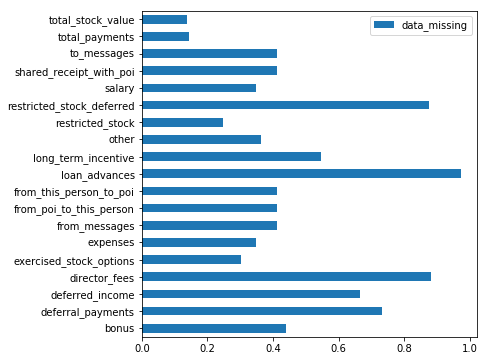

In [360]:
#plotar o numero de informações nulas do projeto
summary = df.describe().transpose()
summary['data_missing'] = (146 - summary['count'])/146
summary[['data_missing']].plot(kind='barh',figsize=(6, 6))

In [361]:
def transform_null(dataframe,financialFeatures,emailFeatures):
    for feature in dataframe.columns:
        if feature in financialFeatures:
            dataframe[feature] = dataframe[feature].fillna(0)
        elif feature in emailFeatures:
            mean = dataframe[feature].mean()
            dataframe[feature] = dataframe[feature].fillna(mean)
    
    return dataframe

def convert_to_NaNs(dataframe):
    for col in dataframe.columns:
        dataframe[col] = dataframe[col].apply(lambda x: np.nan if str(x).strip()=='NaN' else x)
    
    nullByRow,nullByColumn = (nullValues(dataframe))
    
    return dataframe,nullByRow,nullByColumn
   
def nullValues(dataframe):
    nullByRow = dataframe.isnull().sum(axis=1)
    nullByColumn = dataframe.isnull().sum(axis=0)
    
    
    return nullByRow,nullByColumn
 
def inspect_data(dataframe):
    print('There are {} features, and {} persons in the enron data \n'.format(len(dataframe.columns),len(dataframe.index)))
    
    poi_npoi = dataframe['poi'].value_counts().to_dict()
    print('Of the {} persons, {} are classified as Persons of Interest \n'.format(len(dataframe.index),poi_npoi[True]))
    
    dataframe, nullrows,nullcolumns =convert_to_NaNs(df)
    print('The following columns: \n {} have null values greater than 100 \n'.format(nullcolumns[nullcolumns>100]))
    print('The following rows: \n {} \n have null values greater than 15 \n'.format(nullrows[nullrows>15]))

    return dataframe

# popular os nulos do projeto
data = transform_null(df,financialFeatures,emailFeatures)

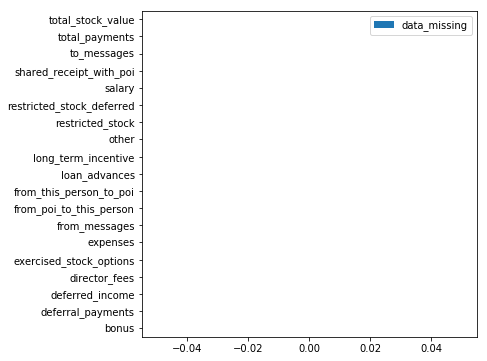

In [362]:
#plotar novamente para verificar se existe nulos 
summary = df.describe().transpose()
summary['data_missing'] = (146 - summary['count'])/146
summary[['data_missing']].plot(kind='barh',figsize=(6, 6))

### Identificação de outliers

Vamos comparar uns dados para encontrar possiveis outliers, primeiro ver salario e bonus

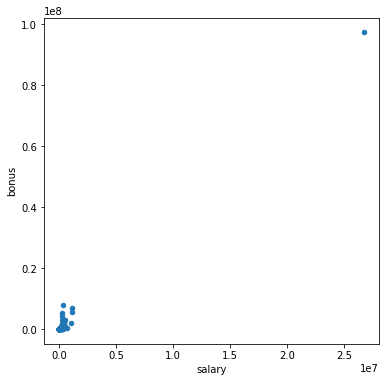

In [363]:
#fazer um plot entre salário e bonus para indentificar possiveis outliers
df.plot.scatter('salary', 'bonus', figsize=(6, 6));

Parece que existem outliser aqui, neste caso precisamos remove-los

In [364]:
#Selecionar o outlier
df.loc[df['salary'] > 0.8 * 1e7]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
TOTAL,97343619.0,32083396.0,-27992891.0,1398517.0,NaN,311764000.0,5235198.0,608.790698,64.895349,41.232558,...,48521928.0,42667589.0,False,130322299.0,-7576788.0,26704229.0,1176.465116,2073.860465,309886585.0,434509511.0


In [365]:
#Remover o outlier
df.drop(['LOCKHART EUGENE E','THE TRAVEL AGENCY IN THE PARK','TOTAL'],inplace=True)

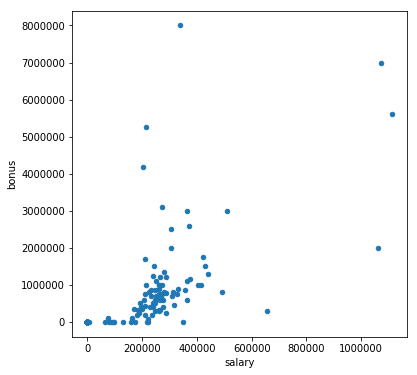

In [366]:
#Explorar novamente
df.plot.scatter('salary', 'bonus', figsize=(6, 6));

### Otimização da Seleção de Características/Engenharia

In [367]:
PERF_FORMAT_STRING = "\
\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedShuffleSplit

def my_test_classifier(clf, dataset, feature_list, folds = 1000):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    X, y = make_classification()
    #y, X = targetFeatureSplit(data)
    #X = np.array(X)
    #y = np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    features_train = X_train
    features_test  = X_test
    labels_train   = y_train
    labels_test    = y_test
        
    ### fit the classifier using training set, and test on test set
    clf.fit(features_train, labels_train)
    predictions = clf.predict(features_test)
    for prediction, truth in zip(predictions, labels_test):
        if prediction == 0 and truth == 0:
            true_negatives += 1
        elif prediction == 0 and truth == 1:
            false_negatives += 1
        elif prediction == 1 and truth == 0:
            false_positives += 1
        elif prediction == 1 and truth == 1:
            true_positives += 1
        else:
            print ("Warning: Found a predicted label not == 0 or 1.")
            print ("All predictions should take value 0 or 1.")
            print ("Evaluating performance for processed predictions:")
            break
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print (clf)
        print (PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5))
        print (RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives))
        print ("")
    except:
        print ("Got a divide by zero when trying out:", clf)
        print ("Precision or recall may be undefined due to a lack of true positive predicitons.")

def test_classifier(clf, dataset, feature_list, folds = 0.5):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    labels = np.array(labels)
    features = np.array(features)
    cv = StratifiedShuffleSplit(n_splits=1000, random_state=42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_idx, test_idx in cv.split(data, labels): 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )
        
        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print ("Warning: Found a predicted label not == 0 or 1.")
                print ("All predictions should take value 0 or 1.")
                print ("Evaluating performance for processed predictions:")
                break
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print (clf)
        print (PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5))
        print (RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives))
        print ("")
    except:
        print ("Got a divide by zero when trying out:", clf)
        print ("Precision or recall may be undefined due to a lack of true positive predicitons.")

In [368]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,average_precision_score
from sklearn.feature_selection import SelectKBest, f_regression

features_list = np.array(allFeatures, copy=True)  

#converter o dataframe em um dicionário
data_dict = df.to_dict(orient='index')

#copiar o dicionário para nao mexer nos dados caso venha a ter algum problema
my_dataset = data_dict
data = featureFormat(my_dataset, features_list, sort_keys=True)

#Separar o target das features
y, X = targetFeatureSplit(data)
X = np.array(X)
y = np.array(y)

#treinar meus dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 100)

### Naive Bayes

In [369]:
#naive bayes
clf = GaussianNB()
clf.fit(X, y)
y_pred = clf.predict(X)

# Avaliação, fonte: https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case
print('Accuracy: ', accuracy_score(clf.predict(X), y))
print('Precision: ', precision_score(y, clf.predict(X)))
print('Recall: ', recall_score(y, clf.predict(X)))   

test_classifier(clf, my_dataset, features_list)

Accuracy:  0.8251748251748252
Precision:  0.36
Recall:  0.5
GaussianNB(priors=None, var_smoothing=1e-09)
	Accuracy: 0.73973	Precision: 0.22374	Recall: 0.38550	F1: 0.28314	F2: 0.33680
	Total predictions: 15000	True positives:  771	False positives: 2675	False negatives: 1229	True negatives: 10325



In [370]:
#Tune Gaussian
parameters = {}
grid = GridSearchCV(clf, parameters, cv=5)
grid.fit(X, y)
print(grid.best_estimator_)

GaussianNB(priors=None, var_smoothing=1e-09)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Arvore de decisão 

In [371]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [372]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('f1: ', f1_score(y_test, y_pred, average="macro"))
print('Precision: ', precision_score(y_test, y_pred, average="macro"))
print('Recall: ', recall_score(y_test, y_pred, average="macro"))    

test_classifier(clf, my_dataset, features_list)

Accuracy:  0.75
f1:  0.42857142857142855
Precision:  0.421875
Recall:  0.43548387096774194
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.79627	Precision: 0.22699	Recall: 0.21950	F1: 0.22318	F2: 0.22096
	Total predictions: 15000	True positives:  439	False positives: 1495	False negatives: 1561	True negatives: 11505



In [373]:
#Tune Decision Tree
parameters = {}
grid = GridSearchCV(clf, parameters, cv=5, scoring='f1')
grid.fit(X_train, y_train)
print(grid.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


### Seleção de features feita de forma inteligente

19
18
                           importance
feature                              
other                           0.196
expenses                        0.181
exercised_stock_options         0.168
total_payments                  0.112
long_term_incentive             0.107
from_poi_to_this_person         0.070
salary                          0.060
deferred_income                 0.059
to_messages                     0.048
bonus                           0.000
restricted_stock_deferred       0.000
shared_receipt_with_poi         0.000
loan_advances                   0.000
restricted_stock                0.000
deferral_payments               0.000
from_this_person_to_poi         0.000
from_messages                   0.000
director_fees                   0.000
total_stock_value               0.000


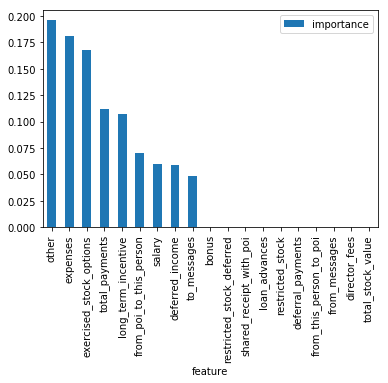

In [374]:
#apresentar as caracteristicas mais importantes, fonte: 
#https://www.fabienplisson.com/choosing-right-features/
print (len(clf.feature_importances_))
print (len(features_list[1:19]))
importances = pd.DataFrame({'feature':features_list[1:20],'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
 
print (importances)
importances.plot.bar()

                           importance
feature                              
bonus                              18
from_messages                      17
shared_receipt_with_poi            16
loan_advances                      15
deferred_income                    14
total_payments                     13
expenses                           12
long_term_incentive                11
exercised_stock_options            10
from_poi_to_this_person             9
restricted_stock_deferred           8
other                               7
salary                              6
from_this_person_to_poi             5
poi                                 4
restricted_stock                    3
director_fees                       2
to_messages                         1
deferral_payments                   0


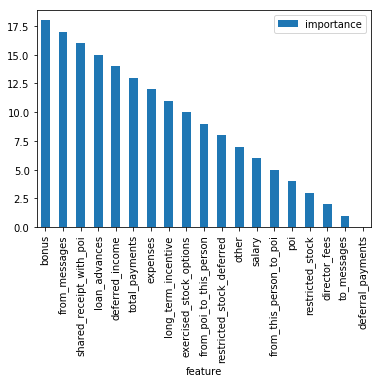

In [375]:
#verificação de featurees
#fonte: https://stackoverflow.com/questions/40245277/visualize-feature-selection-in-descending-order-with-selectkbest
fit = SelectKBest(f_regression, k=19).fit(X, y)

indices = np.argsort(fit.scores_)[::-1]

features = []
for i in range(len(fit.scores_)):
    features.append(features_list[i])
    
#Now plot
importances = pd.DataFrame({'feature':features,'importance':indices})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
print (importances)
importances.plot.bar()

Feature ranking:
1. feature 4 (0.096072)
2. feature 0 (0.091859)
3. feature 2 (0.087655)
4. feature 18 (0.085189)
5. feature 5 (0.073574)
6. feature 11 (0.071640)
7. feature 14 (0.062931)
8. feature 17 (0.057489)
9. feature 7 (0.056145)
10. feature 12 (0.054550)
11. feature 10 (0.051171)
12. feature 8 (0.051053)
13. feature 15 (0.048510)
14. feature 16 (0.035775)
15. feature 6 (0.035566)
16. feature 1 (0.023623)
17. feature 9 (0.008615)
18. feature 13 (0.006757)
19. feature 3 (0.001827)


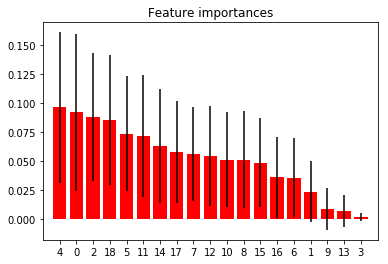

In [376]:
#random forest, fonte: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Criação de novas features
Analisando o nosso DF, podemos trabalhar com uma ideia: <b>Tirar uma porcentagem das mensagens enviadas para um POI</b>, isso poderia ajudar a melhorar o classificador, entao podemos criar 2 novas caracteristicas
<ul>
    <li>from_this_person_to_poi: Relação da quantidades de emails enviados para um POI sobre o total de emails</li>
    <li>from_poi_to_this_person: Relação da quantidades de emails recebidos de um POI sobre o total de emails</li>
</ul>

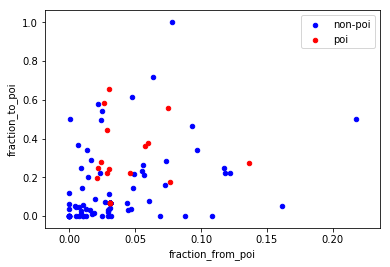

In [377]:
df['fraction_from_poi'] = df['from_poi_to_this_person'] / df['to_messages']
df['fraction_to_poi'] = df['from_this_person_to_poi'] / df['from_messages']

ax = df[df['poi'] == False].plot.scatter(x='fraction_from_poi', y='fraction_to_poi', color='blue', label='non-poi')
df[df['poi'] == True].plot.scatter(x='fraction_from_poi', y='fraction_to_poi', color='red', label='poi', ax=ax)

### Novo classificador com afinamento e seleção de features

In [393]:
#selecionar 10 features do selecktkbest, o poi e as novas features criadas
features_list = ['poi', 'bonus', 'deferred_income', 'shared_receipt_with_poi', 'loan_advances', 
                'total_payments', 'expenses', 'long_term_incentive', 'exercised_stock_options', 
                'fraction_to_poi', 'fraction_from_poi']


#converter o dataframe em um dicionário
data_dict = df.to_dict(orient='index')

#copiar o dicionário para nao mexer nos dados caso venha a ter algum problema
my_dataset = data_dict
data = featureFormat(my_dataset, features_list, sort_keys = True)

y, X = targetFeatureSplit(data)
X = np.array(X)
y = np.array(y)

# alterar o teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [394]:
#naive bayes
clf = GaussianNB(priors=None, var_smoothing=1e-09)
clf.fit(X_train, y_train)

# Avaliação
print('Accuracy test: ', accuracy_score(clf.predict(X_test), y_test))
print('Precision test: ', precision_score(y_test, clf.predict(X_test), average='macro'))
print('Recall test: ', recall_score(y_test, clf.predict(X_test), average='macro'))
test_classifier(clf, my_dataset, features_list)

Accuracy test:  0.875
Precision test:  0.6651162790697674
Recall test:  0.6651162790697674
GaussianNB(priors=None, var_smoothing=1e-09)
	Accuracy: 0.78540	Precision: 0.24741	Recall: 0.29850	F1: 0.27056	F2: 0.28666
	Total predictions: 15000	True positives:  597	False positives: 1816	False negatives: 1403	True negatives: 11184



In [395]:
# arvore de decisão  pra testar após o tuning
clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

print('Accuracy test: ', accuracy_score(clf.predict(X_test), y_test))
print('Precision test: ', precision_score(y_test, clf.predict(X_test),average="macro"))
print('Recall test: ', recall_score(y_test, clf.predict(X_test), average="macro"))
test_classifier(clf, my_dataset, features_list)

Accuracy test:  0.8541666666666666
Precision test:  0.6309523809523809
Recall test:  0.6534883720930232
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.83020	Precision: 0.35475	Recall: 0.33400	F1: 0.34406	F2: 0.33795
	Total predictions: 15000	True positives:  668	False positives: 1215	False negatives: 1332	True negatives: 11785



In [396]:
CLF_PICKLE_FILENAME = "my_classifier_tree.pkl"
DATASET_PICKLE_FILENAME = "my_dataset_tree.pkl"
FEATURE_LIST_FILENAME = "my_feature_list_tree.pkl"

def dump_classifier_and_data(clf, dataset, feature_list):
    with open(CLF_PICKLE_FILENAME, "wb") as clf_outfile:
        pickle.dump(clf, clf_outfile)
    with open(DATASET_PICKLE_FILENAME, "wb") as dataset_outfile:
        pickle.dump(dataset, dataset_outfile)
    with open(FEATURE_LIST_FILENAME, "wb") as featurelist_outfile:
        pickle.dump(feature_list, featurelist_outfile)

dump_classifier_and_data(clf,my_dataset,features_list)

In [397]:
def load_classifier_and_data():
    with open(CLF_PICKLE_FILENAME, "rb") as clf_infile:
        ct = pickle.load(clf_infile)
    with open(DATASET_PICKLE_FILENAME, "rb") as dataset_infile:
        ds = pickle.load(dataset_infile)
    with open(FEATURE_LIST_FILENAME, "rb") as featurelist_infile:
        fl = pickle.load(featurelist_infile)
    return ct, ds, fl

ct, ds, fl = load_classifier_and_data()
### Run testing script
test_classifier(ct, ds, fl)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.83300	Precision: 0.36704	Recall: 0.34850	F1: 0.35753	F2: 0.35206
	Total predictions: 15000	True positives:  697	False positives: 1202	False negatives: 1303	True negatives: 11798

